
# Distances Between Distributions

## Hellinger Distance

The Hellinger distance is a measure of the dissimilarity between two probability distributions. It is defined for two discrete probability distributions $P = (p_1, p_2, ..., p_n)$ and $Q = (q_1, q_2, ..., q_n)$ as:

$$ H(P, Q) = \frac{1}{\sqrt{2}} \sqrt{\sum_{i=1}^{n} (\sqrt{p_i} - \sqrt{q_i})^2} $$

For continuous distributions with density functions $p(x)$ and $q(x)$, it is defined as:

$$ H(p, q) = \frac{1}{\sqrt{2}} \sqrt{\int (\sqrt{p(x)} - \sqrt{q(x)})^2 dx} $$

The Hellinger distance ranges from 0 to 1, where 0 indicates that the distributions are identical and 1 indicates that the distributions are completely different.

## Kullback-Leibler Distance

The Kullback-Leibler (KL) distance, or divergence, measures the difference between two probability distributions over the same variable. It is a non-symmetric measure of the information lost when $Q$ is used to approximate $P$, defined for discrete distributions $P$ and $Q$ as:

$$ D_{KL}(P \parallel Q) = \sum_{i=1}^{n} p_i \log\left(\frac{p_i}{q_i}\right) $$

For continuous distributions with density functions $p(x)$ and $q(x)$, the KL divergence is defined as:

$$ D_{KL}(p \parallel q) = \int p(x) \log\left(\frac{p(x)}{q(x)}\right) dx $$

Unlike the Hellinger distance, the KL divergence can be infinite if there exists some $x$ such that $p(x) > 0$ and $q(x) = 0$, and it is not symmetric, meaning $D_{KL}(P \parallel Q) \neq D_{KL}(Q \parallel P)$.

These metrics are useful in various fields, including statistics, machine learning, and information theory, for tasks such as distribution comparison, model selection, and more.

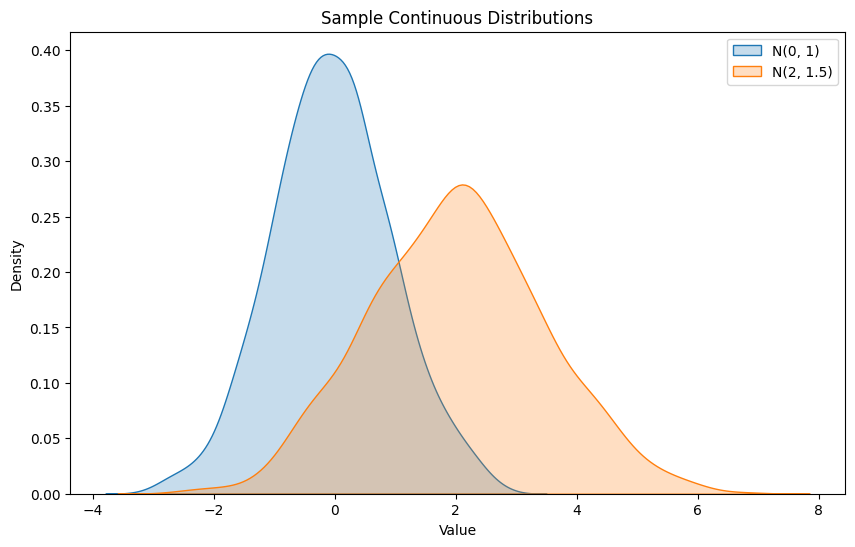

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate two sample continuous distributions
np.random.seed(0)  # For reproducibility
sample_size = 1000

# Distribution 1: N(0, 1)
mu1, sigma1 = 0, 1
sample1 = np.random.normal(mu1, sigma1, sample_size)

# Distribution 2: N(2, 1.5)
mu2, sigma2 = 2, 1.5
sample2 = np.random.normal(mu2, sigma2, sample_size)

# Plotting the distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(sample1, label="N(0, 1)", fill=True)
sns.kdeplot(sample2, label="N(2, 1.5)", fill=True)
plt.title("Sample Continuous Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [16]:
# Analytical calculation of Hellinger distance and KL divergence

# Function to calculate the squared Hellinger distance for normal distributions
def hellinger_squared(mu1, sigma1, mu2, sigma2):
    return 1 - np.sqrt(2 * sigma1 * sigma2 / (sigma1**2 + sigma2**2)) * np.exp(-1/4 * ((mu1 - mu2)**2) / (sigma1**2 + sigma2**2))

# Function to calculate KL divergence for normal distributions
def kl_divergence_normal(mu1, sigma1, mu2, sigma2):
    return np.log(sigma2 / sigma1) + (sigma1**2 + (mu1 - mu2)**2) / (2 * sigma2**2) - 0.5

# Calculate squared Hellinger distance and then take the square root for the Hellinger distance
hellinger_dist = np.sqrt(hellinger_squared(mu1, sigma1, mu2, sigma2))

# Calculate KL divergence
kl_div = kl_divergence_normal(mu1, sigma1, mu2, sigma2)

hellinger_dist, kl_div


(0.5419399519908932, 1.0165762192192755)

The Hellinger distance between the two distributions is approximately 0.5420.542, and the Kullback-Leibler (KL) divergence is approximately 1.0171.017.

These metrics indicate the degree of dissimilarity between the two distributions, with the Hellinger distance showing a moderate difference and the KL divergence providing a measure of the information loss when one distribution is used to approximate the other.